In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Data Analysis for Training Set

In [12]:
df = pd.read_csv('../_data/aflow_training_set.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,volume_atom,volume_cell,density,nspecies,stoichiometry,natoms,enthalpy_atom,electronegativity,group_numbers,Egap,Egap_type
0,0.062680,0.075245,0.455628,0.142857,0.819337,0.118012,0.148862,0.512563,0.573389,0.0000,metal
1,0.056090,0.005885,0.341321,0.142857,0.883628,0.006211,0.132838,0.582915,0.846931,0.4356,insulator-indirect
2,0.084915,0.028068,0.247910,0.142857,0.957887,0.031056,0.220755,0.368090,0.172894,0.0000,metal
3,0.047233,0.066869,0.392057,0.285714,0.899576,0.130435,0.204915,0.788945,0.625048,0.1958,insulator-direct
4,0.153241,0.176767,0.289526,0.285714,0.780463,0.130435,0.205447,0.572027,0.650591,1.6227,insulator-direct
...,...,...,...,...,...,...,...,...,...,...,...
52529,0.046321,0.004964,0.609187,0.142857,0.883628,0.006211,0.108523,0.542714,0.523256,0.0000,metal
52530,0.051342,0.051422,0.172185,0.142857,0.796162,0.093168,0.175701,0.432161,0.429851,0.0000,metal
52531,0.068718,0.015282,0.202133,0.285714,0.666085,0.018634,0.177943,0.401173,0.824438,1.9680,insulator-indirect
52532,0.086477,0.008749,0.282762,0.142857,0.883628,0.006211,0.196514,0.395729,0.178040,0.0000,metal


Class counts: metal                 27396
insulator-indirect    15838
insulator-direct       9300
Name: Egap_type, dtype: int64
Class percentage: metal                 52.149084
insulator-indirect    30.148095
insulator-direct      17.702821
Name: Egap_type, dtype: float64


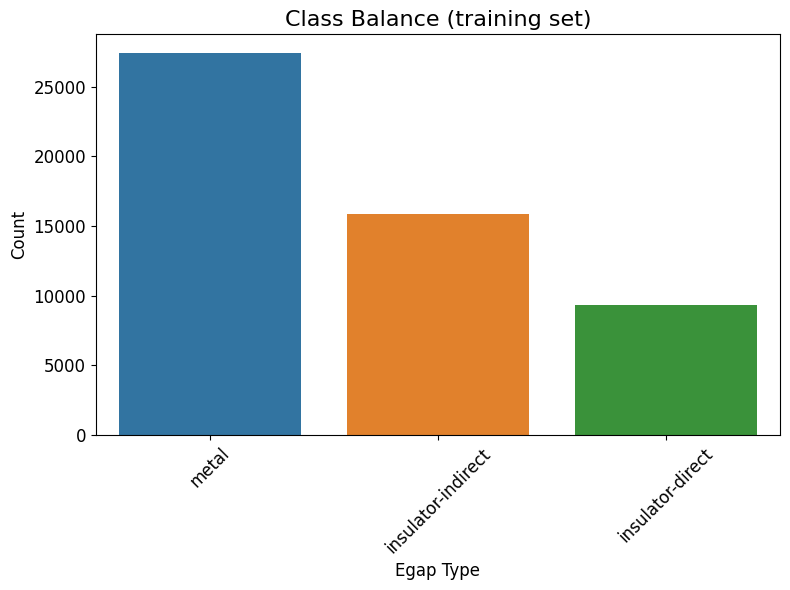

In [13]:
class_counts = df['Egap_type'].value_counts()
print('Class counts:', class_counts)

# class percentage for bandgap type
class_percentage = class_counts / class_counts.sum() * 100
print('Class percentage:', class_percentage)

# plotting the class percentage for bandgap type
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Egap_type', data=df, ax=ax)
plt.title('Class Balance (training set)', fontsize=16)
plt.xlabel('Egap Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.savefig('../plots/class_counts_training_set.pdf')
plt.show()

/tmp/ipykernel_1578780/2242703122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


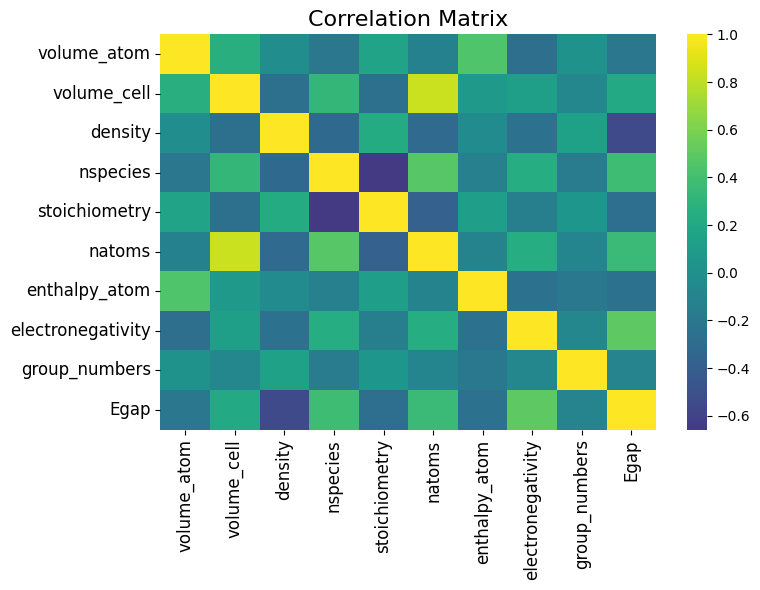

In [14]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, annot=False, cmap='viridis', center=0, ax=ax)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../plots/aflow_corr_training_set.pdf')
plt.show()

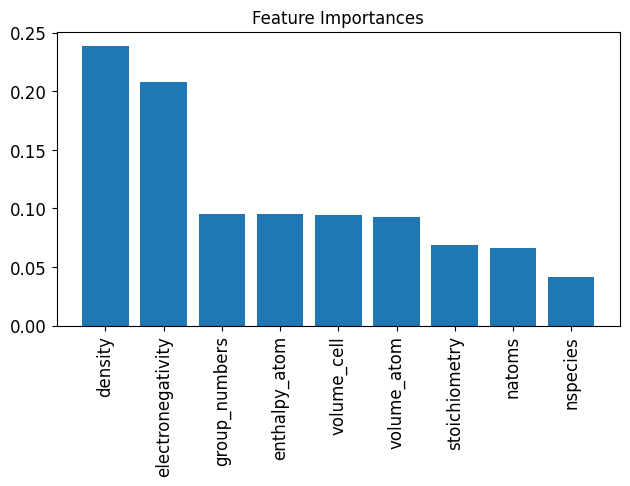

In [15]:
X = df.drop(['Egap', 'Egap_type'], axis=1)
y = df['Egap_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.title('Feature Importances')
plt.savefig('../plots/classifier_feature_importance_training_set.pdf')
plt.show()

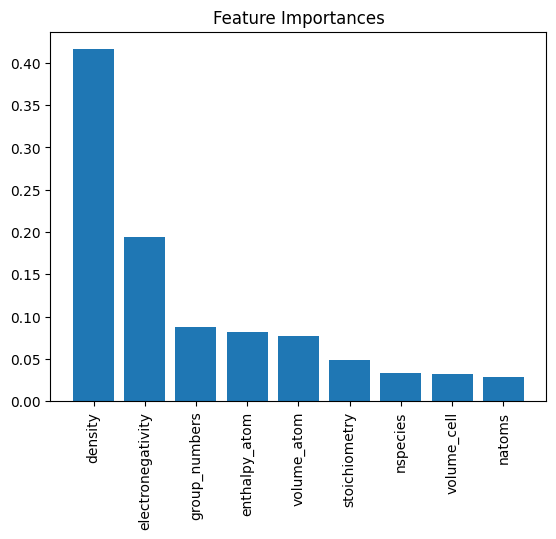

In [16]:
X = df.drop(['Egap', 'Egap_type'], axis=1)
y = df['Egap']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)


importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importances')
plt.savefig('../plots/regressor_feature_importance_training_set.pdf')
plt.show()

In [17]:
df[['is_metal', 'gap_type']] = df['Egap_type'].str.split('-', expand=True)
df.drop(columns=['Egap_type'], inplace=True)
df

,volume_atom,volume_cell,density,nspecies,stoichiometry,natoms,enthalpy_atom,electronegativity,group_numbers,Egap,is_metal,gap_type
0,0.062680,0.075245,0.455628,0.142857,0.819337,0.118012,0.148862,0.512563,0.573389,0.0000,metal,None
1,0.056090,0.005885,0.341321,0.142857,0.883628,0.006211,0.132838,0.582915,0.846931,0.4356,insulator,indirect
2,0.084915,0.028068,0.247910,0.142857,0.957887,0.031056,0.220755,0.368090,0.172894,0.0000,metal,None
3,0.047233,0.066869,0.392057,0.285714,0.899576,0.130435,0.204915,0.788945,0.625048,0.1958,insulator,direct
4,0.153241,0.176767,0.289526,0.285714,0.780463,0.130435,0.205447,0.572027,0.650591,1.6227,insulator,direct
...,...,...,...,...,...,...,...,...,...,...,...,...
52529,0.046321,0.004964,0.609187,0.142857,0.883628,0.006211,0.108523,0.542714,0.523256,0.0000,metal,None
52530,0.051342,0.051422,0.172185,0.142857,0.796162,0.093168,0.175701,0.432161,0.429851,0.0000,metal,None
52531,0.068718,0.015282,0.202133,0.285714,0.666085,0.018634,0.177943,0.401173,0.824438,1.9680,insulator,indirect
52532,0.086477,0.008749,0.282762,0.142857,0.883628,0.006211,0.196514,0.395729,0.178040,0.0000,metal,None


In [18]:
df.to_csv('../_data/aflow_training_set.csv', index=False)

## Data Analysis for Test Set

In [19]:
df = pd.read_csv('../_data/aflow_test_set.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,volume_atom,volume_cell,density,nspecies,stoichiometry,natoms,enthalpy_atom,electronegativity,group_numbers,Egap,Egap_type
0,0.044886,0.106160,0.090634,0.142857,0.957887,0.217391,0.155915,0.670854,0.553183,5.4049,insulator-direct
1,0.045964,0.083740,0.183024,0.428571,0.430102,0.167702,0.169622,0.618719,0.776401,3.7219,insulator-indirect
2,0.064005,0.006631,0.279607,0.142857,0.883628,0.006211,0.156377,0.520101,0.839878,0.0000,metal
3,0.085055,0.067093,0.226535,0.428571,0.775978,0.080745,0.195514,0.415829,0.171369,1.6829,insulator-direct
4,0.031784,0.072120,0.082191,0.571429,0.557438,0.186335,0.186590,0.709548,0.593023,2.5829,insulator-indirect
...,...,...,...,...,...,...,...,...,...,...,...
2760,0.062582,0.048453,0.148414,0.285714,0.195863,0.074534,0.176105,0.504188,0.271254,0.0000,metal
2761,0.099568,0.098896,0.329804,0.285714,0.328183,0.105590,0.187218,0.338358,0.029165,0.0000,metal
2762,0.060880,0.155697,0.241217,0.571429,0.064291,0.254658,0.183174,0.643216,0.624285,2.7432,insulator-indirect
2763,0.028866,0.003319,0.342532,0.142857,0.883628,0.006211,0.140112,0.582915,0.527068,0.0000,metal


Class counts: metal                 1446
insulator-indirect     843
insulator-direct       476
Name: Egap_type, dtype: int64
Class percentage: metal                 52.296564
insulator-indirect    30.488246
insulator-direct      17.215190
Name: Egap_type, dtype: float64


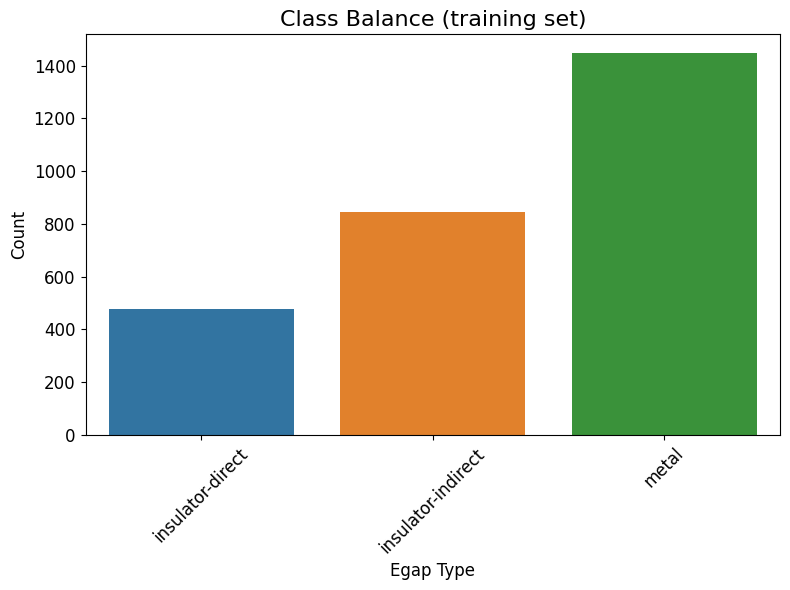

In [20]:
class_counts = df['Egap_type'].value_counts()
print('Class counts:', class_counts)

# class percentage for bandgap type
class_percentage = class_counts / class_counts.sum() * 100
print('Class percentage:', class_percentage)

# plotting the class percentage for bandgap type
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Egap_type', data=df, ax=ax)
plt.title('Class Balance (training set)', fontsize=16)
plt.xlabel('Egap Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.savefig('../plots/class_counts_test_set.pdf')
plt.show()

In [21]:
df[['is_metal', 'gap_type']] = df['Egap_type'].str.split('-', expand=True)
df.drop(columns=['Egap_type'], inplace=True)
df

,volume_atom,volume_cell,density,nspecies,stoichiometry,natoms,enthalpy_atom,electronegativity,group_numbers,Egap,is_metal,gap_type
0,0.044886,0.106160,0.090634,0.142857,0.957887,0.217391,0.155915,0.670854,0.553183,5.4049,insulator,direct
1,0.045964,0.083740,0.183024,0.428571,0.430102,0.167702,0.169622,0.618719,0.776401,3.7219,insulator,indirect
2,0.064005,0.006631,0.279607,0.142857,0.883628,0.006211,0.156377,0.520101,0.839878,0.0000,metal,None
3,0.085055,0.067093,0.226535,0.428571,0.775978,0.080745,0.195514,0.415829,0.171369,1.6829,insulator,direct
4,0.031784,0.072120,0.082191,0.571429,0.557438,0.186335,0.186590,0.709548,0.593023,2.5829,insulator,indirect
...,...,...,...,...,...,...,...,...,...,...,...,...
2760,0.062582,0.048453,0.148414,0.285714,0.195863,0.074534,0.176105,0.504188,0.271254,0.0000,metal,None
2761,0.099568,0.098896,0.329804,0.285714,0.328183,0.105590,0.187218,0.338358,0.029165,0.0000,metal,None
2762,0.060880,0.155697,0.241217,0.571429,0.064291,0.254658,0.183174,0.643216,0.624285,2.7432,insulator,indirect
2763,0.028866,0.003319,0.342532,0.142857,0.883628,0.006211,0.140112,0.582915,0.527068,0.0000,metal,None


In [22]:
df.to_csv('../_data/aflow_test_set.csv', index=False)